In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import scipy.stats as sts
#from scipy.stats import linregress
from pprint import pprint
#import warnings
#warnings.filterwarnings('ignore')
#import ipywidgets as widgets
%matplotlib inline


In [2]:
#%pip install citipy

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

In [ ]:
##cityurl = "http://api.openweathermap.org/data/2.5/weather?"
#city = "london" 
#Parameter for the API call
##api_key_weather = "ce3f01dd4d23d07b4cfb5ca82f3ea6e5"
##parameters={'appid':api_key_weather, "units":"imperial"}
##results = []
#contentType ='json'
#loop through the list of cities and perform a request for weather data for each city
##for city in cities:
    ##parameters['q']=city
    ##response = requests.get(cityurl, params=parameters)
    ##weatherjson=response.json()
    ##if weatherjson['cod']==200:
        ##results.append(response)
    ##else:
        ##if weatherjson['cod']==404:
            ##print('Data not available')

##time.sleep(5)
#display(results)

In [5]:
#set up list to hold response info
results = []
counter = 0
cityurl = "http://api.openweathermap.org/data/2.5/weather?"
#city = "london" 
api_key_weather = "ce3f01dd4d23d07b4cfb5ca82f3ea6e5"
parameters={'appid':api_key_weather, "units":"imperial"}


for city in cities:
    parameters['q']=city
    response = requests.get(cityurl, params=parameters).json()

    #try/except statement to handle errors when city is not found on openweather site
    try:
        #create dictionary
        city_data = {
            "City": response['name'],
            "Lat": response['coord']['lat'],
            "Lng": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Humidity": response['main']['humidity'],
            "Cloudiness": response['clouds']['all'],
            "Wind Speed": response['wind']['speed'],
            "Country": response['sys']['country'],
            "Date": response['dt']
        }
        results.append(city_data)
        counter = counter + 1
        print(f"{counter} City Name: {response['name']} / ID:{response['id']}")
    except:
        print("Missing city | " + city)


1 City Name: Provideniya / ID:4031574
2 City Name: Khatanga / ID:2022572
3 City Name: Mehamn / ID:778707
4 City Name: Mugur-Aksy / ID:1498283
Missing city | mutsamudu
5 City Name: Aksarka / ID:1512019
6 City Name: Castro / ID:3466704
7 City Name: Hobart / ID:2163355
8 City Name: Bluff / ID:2206939
9 City Name: Busselton / ID:2075265
Missing city | malwan
10 City Name: Rikitea / ID:4030556
11 City Name: Ciudad de Allende / ID:4018762
12 City Name: Yellowknife / ID:6185377
13 City Name: Vaini / ID:4032243
14 City Name: Jamestown / ID:5122534
15 City Name: Rome / ID:5134295
16 City Name: Mataura / ID:6201424
17 City Name: Yar-Sale / ID:1486321
18 City Name: Faya / ID:110690
19 City Name: Punta Arenas / ID:3874787
Missing city | labutta
20 City Name: East London / ID:1006984
21 City Name: San Patricio / ID:4726521
22 City Name: Nuuk / ID:3421319
23 City Name: Narsaq / ID:3421719
24 City Name: Plymouth / ID:4947607
25 City Name: San Quintín / ID:3984997
26 City Name: Khorixas / ID:3356213
2

In [ ]:

# latitude=[response.get('coord').get('lat') for response in results]
# longitude=[response.get('coord').get('lon') for response in results]
# Country=[response.get('sys').get('country') for response in results]
# Date=[response.get('dt') for response in results]
# Temperature=[response.get('main').get('temp_max') for response in results]
# Humidity=[response.get('main').get('humidity') for response in results]
# Cloudiness=[response.get('clouds').get('all') for response in results]
# Wind_Speed=[response.get('wind').get('speed') for response in results]
# city=[response.get('name') for response in results]


In [6]:
# # Create a DataFrame.
city_df = pd.DataFrame(results)
city_df
# write to output file
city_df.to_csv("weatherhome.csv", index=False)                      

In [7]:
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,-0.18,90,100,29.48,RU,1613180513
1,Khatanga,71.9667,102.5000,-26.37,86,100,8.12,RU,1613180513
2,Mehamn,71.0357,27.8492,16.05,95,53,6.76,NO,1613180514
3,Mugur-Aksy,50.3500,90.5000,-8.63,78,2,4.88,RU,1613180514
4,Aksarka,66.5606,67.7975,-23.39,86,100,4.56,RU,1613180515
...,...,...,...,...,...,...,...,...,...
565,Brae,60.3964,-1.3530,37.40,48,90,27.63,GB,1613180582
566,Kampot,10.6167,104.1833,80.60,88,40,1.14,KH,1613180799
567,Namatanai,-3.6667,152.4333,85.28,69,74,6.44,PG,1613180799
568,Alugan,12.2188,125.4808,81.21,81,50,0.67,PH,1613180799


The scatter plot vvvvvv


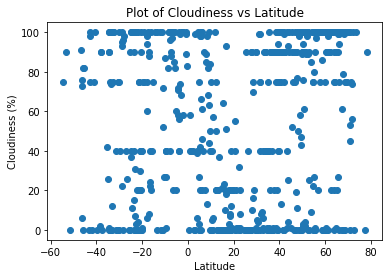

In [8]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"])
plt.title('Plot of Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print("The scatter plot vvvvvv")

The scatter plot vvvvvv


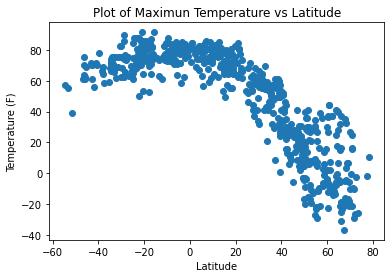

In [9]:
plt.scatter(city_df["Lat"], city_df["Max Temp"])
plt.title('Plot of Maximun Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print("The scatter plot vvvvvv")

The scatter plot vvvvvv


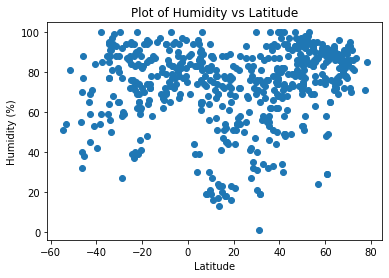

In [10]:
plt.scatter(city_df["Lat"], city_df["Humidity"])
plt.title('Plot of Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print("The scatter plot vvvvvv")

The scatter plot vvvvvv


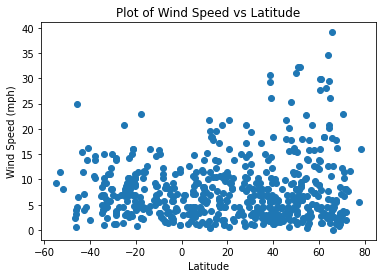

In [11]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"])
plt.title('Plot of Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print("The scatter plot vvvvvv")

In [12]:
northhemisp=city_df.loc[city_df["Lat"]>0]
northhemisp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,-0.18,90,100,29.48,RU,1613180513
1,Khatanga,71.9667,102.5000,-26.37,86,100,8.12,RU,1613180513
2,Mehamn,71.0357,27.8492,16.05,95,53,6.76,NO,1613180514
3,Mugur-Aksy,50.3500,90.5000,-8.63,78,2,4.88,RU,1613180514
4,Aksarka,66.5606,67.7975,-23.39,86,100,4.56,RU,1613180515
...,...,...,...,...,...,...,...,...,...
563,Esim,4.8699,-2.2405,80.47,86,3,7.14,GH,1613180798
565,Brae,60.3964,-1.3530,37.40,48,90,27.63,GB,1613180582
566,Kampot,10.6167,104.1833,80.60,88,40,1.14,KH,1613180799
568,Alugan,12.2188,125.4808,81.21,81,50,0.67,PH,1613180799


In [13]:
southhemisp=city_df.loc[city_df["Lat"]<0]
southhemisp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,Castro,-24.7911,-50.0119,61.25,94,37,3.04,BR,1613180516
6,Hobart,-42.8794,147.3294,70.00,59,75,11.50,AU,1613180418
7,Bluff,-46.6000,168.3333,60.91,55,91,2.35,NZ,1613180495
8,Busselton,-33.6500,115.3333,74.66,50,0,4.32,AU,1613180516
9,Rikitea,-23.1203,-134.9692,80.46,71,7,10.07,PF,1613180491
...,...,...,...,...,...,...,...,...,...
558,Bulungu,-4.5500,18.6000,71.33,90,72,2.66,CD,1613180798
559,Kawalu,-7.3817,108.2082,81.81,73,88,1.54,ID,1613180608
562,Porto Belo,-27.1578,-48.5531,75.20,94,40,4.61,BR,1613180798
564,Clarence Town,-32.5833,151.7833,75.20,94,75,4.61,AU,1613180798


The correlation coeficient r for Maximum TEMPERATURE (N) is: -0.8757484472534229
The correlation coeficient r for HUMIDITY (N) is: 0.35924474918668736
The correlation coeficient r for CLOUDINESS (N) is: 0.36921775591541994
The correlation coeficient r for WIND SPEED (N) is: 0.11796256629607482
The correlation coeficient r for Maximum TEMPERATURE (S) is: 0.4514117516381476
The correlation coeficient r for HUMIDITY (S) is: 0.27173651100724194
The correlation coeficient r for CLOUDINESS (S) is: 0.15566559327372417
The correlation coeficient r for WIND SPPED (S) is: -0.1323397239049698


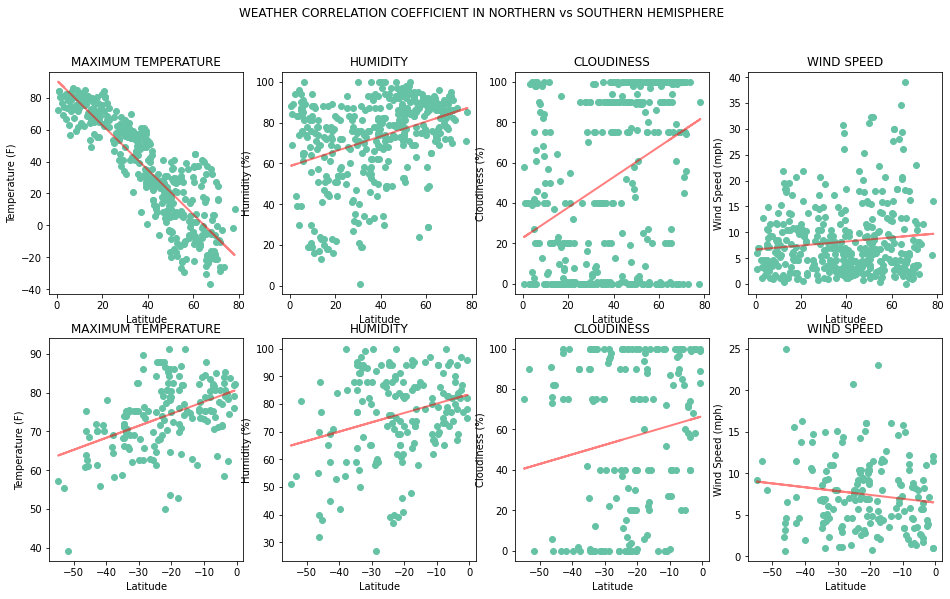

In [14]:
# Run linear regression on each relationship: 
fig,ax = plt.subplots(2,4, figsize=(16,9))
fig.suptitle('WEATHER CORRELATION COEFFICIENT IN NORTHERN vs SOUTHERN HEMISPHERE')

#NORTHERN HEMISPHERE:
#Northen Hemisphere- Temperature(F) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Max Temp'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][0].scatter(northhemisp['Lat'], northhemisp['Max Temp'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][0].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][0].title.set_text('MAXIMUM TEMPERATURE')
ax[0][0].set_ylabel('Temperature (F)')
ax[0][0].set_xlabel('Latitude')
print("The correlation coeficient r for Maximum TEMPERATURE (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Max Temp'])[0]))

#Northen Hemisphere- Humidity(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Humidity'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][1].scatter(northhemisp['Lat'], northhemisp['Humidity'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][1].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][1].title.set_text('HUMIDITY')
ax[0][1].set_ylabel('Humidity (%)')
ax[0][1].set_xlabel('Latitude')
print("The correlation coeficient r for HUMIDITY (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Humidity'])[0]))

#Northen Hemisphere- Cloudiness(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Cloudiness'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][2].scatter(northhemisp['Lat'], northhemisp['Cloudiness'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][2].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][2].title.set_text('CLOUDINESS')
ax[0][2].set_ylabel('Cloudiness (%)')
ax[0][2].set_xlabel('Latitude')
print("The correlation coeficient r for CLOUDINESS (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Cloudiness'])[0]))

#Northen Hemisphere- wind Speed(mph) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Wind Speed'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][3].scatter(northhemisp['Lat'], northhemisp['Wind Speed'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][3].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][3].title.set_text('WIND SPEED')
ax[0][3].set_ylabel('Wind Speed (mph)')
ax[0][3].set_xlabel('Latitude')
print("The correlation coeficient r for WIND SPEED (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Wind Speed'])[0]))

#SOUTHERN HEMISPHERE
#Southern Hemisphere - Temperature(F) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Max Temp'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][0].scatter(southhemisp['Lat'], southhemisp['Max Temp'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][0].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][0].title.set_text('MAXIMUM TEMPERATURE')
ax[1][0].set_ylabel('Temperature (F)')
ax[1][0].set_xlabel('Latitude')
print("The correlation coeficient r for Maximum TEMPERATURE (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Max Temp'])[0]))

#Southern Hemisphere - Humidity(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Humidity'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][1].scatter(southhemisp['Lat'], southhemisp['Humidity'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][1].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][1].title.set_text('HUMIDITY')
ax[1][1].set_ylabel('Humidity (%)')
ax[1][1].set_xlabel('Latitude')
print("The correlation coeficient r for HUMIDITY (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Humidity'])[0]))

#Southern Hemisphere - Cloudiness(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Cloudiness'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][2].scatter(southhemisp['Lat'], southhemisp['Cloudiness'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][2].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][2].title.set_text('CLOUDINESS')
ax[1][2].set_ylabel('Cloudiness (%)')
ax[1][2].set_xlabel('Latitude')
print("The correlation coeficient r for CLOUDINESS (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Cloudiness'])[0]))

#Southern Hemisphere - wind Speed(mph) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Wind Speed'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][3].scatter(southhemisp['Lat'], southhemisp['Wind Speed'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][3].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][3].title.set_text('WIND SPEED')
ax[1][3].set_ylabel('Wind Speed (mph)')
ax[1][3].set_xlabel('Latitude')
print("The correlation coeficient r for WIND SPEED (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Wind Speed'])[0]))
